In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset

Using TensorFlow backend.


In [76]:
#read dataset using pandas
data_set = pd.read_csv("dataset/musk_csv.csv")

In [77]:
#show firs five rows
data_set.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [78]:
#how many rows belongs to particular class..
data_set['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [79]:
#drop unnessary column and 
data_set.drop(columns=["molecule_name", "conformation_name","ID"],inplace=True)

In [80]:
data_set.shape

(6598, 167)

In [81]:
#show all column
data_set.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=167)

In [82]:
#correlation matrix
data_set.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
f1,1.000000,-0.142464,-0.164292,-0.291054,0.001037,0.090659,0.071879,-0.416191,0.090701,0.185305,...,0.010485,0.146428,-0.153096,0.002383,0.634797,-0.061317,0.142004,0.443060,-0.057199,-0.120883
f2,-0.142464,1.000000,0.611675,-0.244145,-0.134689,0.125947,-0.449526,0.187318,-0.484187,0.270608,...,0.172481,0.309392,0.339496,-0.030338,-0.118212,-0.028524,-0.069193,-0.133091,0.046361,-0.099896
f3,-0.164292,0.611675,1.000000,-0.378516,-0.080964,0.210432,-0.754798,0.426254,-0.760313,0.429700,...,0.261200,0.502924,0.259424,-0.020607,-0.206860,-0.131828,-0.111005,-0.086150,0.020434,-0.089760
f4,-0.291054,-0.244145,-0.378516,1.000000,-0.044896,-0.222191,0.453786,0.185135,0.420407,-0.559255,...,-0.308906,-0.607435,-0.279430,-0.118705,-0.241346,0.182826,-0.189530,-0.364233,0.072985,-0.098592
f5,0.001037,-0.134689,-0.080964,-0.044896,1.000000,0.024860,0.045389,-0.162539,0.064376,0.005144,...,0.004808,0.019286,0.225484,0.195782,0.103419,0.027131,-0.046188,-0.090038,-0.081910,-0.045040
f6,0.090659,0.125947,0.210432,-0.222191,0.024860,1.000000,-0.238260,0.002716,-0.230350,0.164480,...,0.179304,0.551549,0.056876,0.043218,0.062755,0.046881,0.024317,0.002557,-0.050493,-0.089248
f7,0.071879,-0.449526,-0.754798,0.453786,0.045389,-0.238260,1.000000,-0.387768,0.802427,-0.475847,...,-0.273047,-0.574676,-0.263716,-0.007488,0.120020,0.131520,0.049882,0.000166,0.004980,0.113093
f8,-0.416191,0.187318,0.426254,0.185135,-0.162539,0.002716,-0.387768,1.000000,-0.407809,-0.028531,...,0.009139,0.034078,-0.003369,-0.102444,-0.353299,-0.090044,-0.266026,-0.298356,0.138932,-0.201554
f9,0.090701,-0.484187,-0.760313,0.420407,0.064376,-0.230350,0.802427,-0.407809,1.000000,-0.484321,...,-0.268116,-0.540391,-0.234395,0.011911,0.145991,0.127985,0.058630,0.016455,-0.002590,0.147509
f10,0.185305,0.270608,0.429700,-0.559255,0.005144,0.164480,-0.475847,-0.028531,-0.484321,1.000000,...,0.279717,0.507555,0.145790,0.042411,0.115375,-0.115943,0.131188,0.238632,-0.075235,0.021896


In [83]:
#remove high correlation features
corr_matrix = data_set.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [84]:
data_set.drop(data_set[to_drop], axis=1)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,52,104,137,168,-60,-135,80,1
5,46,-194,-145,28,-117,72,57,-168,-39,-22,...,-239,-138,56,143,142,164,-67,-145,40,1
6,47,-199,-106,28,-117,73,27,-104,-22,-23,...,-238,-133,55,144,142,165,-68,-145,37,1
7,41,-199,-101,22,-117,-6,26,-99,-21,-101,...,-235,-59,50,100,135,169,-60,-135,81,1
8,41,-199,-101,22,-117,-6,26,-100,-21,-101,...,-235,-59,50,100,135,169,-60,-135,81,1
9,47,-199,-106,28,-117,73,27,-104,-22,-23,...,-238,-133,55,144,142,165,-68,-146,37,1


In [85]:
#shape
data_set.shape

(6598, 167)

In [115]:
# split into input (X) and output (Y) variables
X = data_set.drop("class",axis=1)
y = data_set['class']
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


In [87]:
#split the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=166, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [97]:
from sklearn.preprocessing import StandardScaler
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
print("*********************")
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
#k fold cross validation..
kfold = StratifiedKFold(n_splits=5, shuffle=True)
print("####################")
results = cross_val_score(pipeline, X, y, cv=kfold)
print("helllllllllllllllllllllllllllllllloooooooooooooooooooooo")
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

*********************
####################


/home/techgig/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/techgig/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/techgig/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/techgig/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/techgig/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were a

helllllllllllllllllllllllllllllllloooooooooooooooooooooo
Standardized: 99.70% (0.23%)


In [99]:
model = create_baseline()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [102]:
b=model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 105us/step - loss: 3.5383 - accuracy: 0.8704 - val_loss: 2.4497 - val_accuracy: 0.8303
Epoch 2/10
5278/5278 [==============================] - 0s 84us/step - loss: 1.4245 - accuracy: 0.9113 - val_loss: 1.0481 - val_accuracy: 0.9394
Epoch 3/10
5278/5278 [==============================] - 0s 80us/step - loss: 0.8439 - accuracy: 0.9354 - val_loss: 1.7777 - val_accuracy: 0.8795
Epoch 4/10
5278/5278 [==============================] - 0s 77us/step - loss: 0.6624 - accuracy: 0.9466 - val_loss: 0.4887 - val_accuracy: 0.9500
Epoch 5/10
5278/5278 [==============================] - 0s 77us/step - loss: 0.4411 - accuracy: 0.9545 - val_loss: 0.3683 - val_accuracy: 0.9462
Epoch 6/10
5278/5278 [==============================] - 0s 82us/step - loss: 0.5611 - accuracy: 0.9475 - val_loss: 0.5213 - val_accuracy: 0.9417
Epoch 7/10
5278/5278 [==============================] - 0s 86us/step - loss: 0.48

In [112]:
#history
history = b.history
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.20%


In [105]:
print(history)

{'val_loss': [2.4496898810068766, 1.0480793431783721, 1.7776693177945686, 0.4887333506686348, 0.368334347817461, 0.5212533492349394, 0.4472363696911982, 0.36961436880680953, 0.42367367258902044, 0.22139400148776497], 'val_accuracy': [0.8303030133247375, 0.939393937587738, 0.8795454502105713, 0.949999988079071, 0.946212112903595, 0.9416666626930237, 0.967424213886261, 0.9666666388511658, 0.9681817889213562, 0.971969723701477], 'loss': [3.5383269584300856, 1.4244636669194555, 0.8439086793538142, 0.6623613563909628, 0.4410884516384869, 0.5611162938228382, 0.48052570393028454, 0.48886404220890145, 0.2763512891776163, 0.180049792841817], 'accuracy': [0.87040544, 0.91133004, 0.9353922, 0.9465707, 0.9545282, 0.947518, 0.9558545, 0.9545282, 0.96816975, 0.97518]}


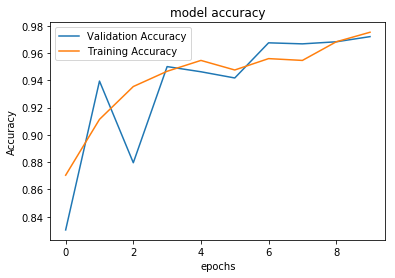

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history["val_accuracy"],label="Validation Accuracy")
plt.plot(history["accuracy"],label="Training Accuracy")
plt.legend()
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

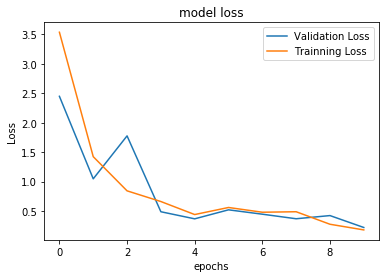

In [111]:
#plot value loss
plt.plot(history["val_loss"],label = "Validation Loss")
plt.plot(history["loss"],label="Trainning Loss")
plt.legend()
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

In [126]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report
#confusion matrix
predict_y = model.predict_classes(X_test)
CM = confusion_matrix(y_test,predict_y)
print("confuson matrix:\n",CM)
#precision score TP/TP+FP
precision = (CM[0][0]/(CM[0][0] + CM[0][1]))
print("Precision:%.2f"%(precision*100),"%")
#recall TP/TP+FN
recall = CM[0][0]/(CM[0][0]+CM[1][1])
print("Recall:%.2f"%(recall*100),"%")
#f1 Score
print("f1 score:%.2f"%(f1_score(y_test,predict_y)*100),"%")
print("Classification Report:\n",classification_report(y_test,predict_y))

confuson matrix:
 [[1096   24]
 [  13  187]]
Precision:97.86 %
Recall:85.42 %
f1 score:91.00 %
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1120
           1       0.89      0.94      0.91       200

   micro avg       0.97      0.97      0.97      1320
   macro avg       0.94      0.96      0.95      1320
weighted avg       0.97      0.97      0.97      1320

